In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import xgboost as xgb
import matplotlib.pyplot as plt
plt.rcParams[ 'figure.figsize' ] = (10, 8)

# Загружаем данные

In [3]:
macro_cols = ["balance_trade", "balance_trade_growth", "eurrub", "average_provision_of_build_contract",
"micex_rgbi_tr", "micex_cbi_tr", "deposits_rate", "mortgage_value", "mortgage_rate",
"income_per_cap", "rent_price_4+room_bus", "museum_visitis_per_100_cap", "apartment_build"]

Data_cols=['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'state',
       'product_type', 'sub_area', 'area_m', 'raion_popul',
       'green_zone_part', 'indust_part', 'children_preschool',
       'preschool_quota', 'preschool_education_centers_raion',
       'children_school', 'school_quota', 'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25', 'culture_objects_top_25_raion',
       'shopping_centers_raion', 'office_raion',
        'full_all', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk',
       'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km',
       'green_zone_km', 'industrial_km', 'water_treatment_km',
       'cemetery_km', 'incineration_km', 'railroad_station_walk_km',
       'railroad_station_walk_min',
       'railroad_station_avto_km', 'railroad_station_avto_min',
        'public_transport_station_km',
       'public_transport_station_min_walk', 'water_km', 'water_1line',
       'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km',
       'big_road1_km',  'big_road1_1line', 'big_road2_km',
       'ID_big_road2', 'railroad_km', 'railroad_1line',
       'zd_vokzaly_avto_km', 
       'bus_terminal_avto_km',  'oil_chemistry_km',
       'nuclear_reactor_km', 'radiation_km', 'power_transmission_line_km',
       'thermal_power_plant_km', 'ts_km', 'big_market_km',
       'market_shop_km',  'hospice_morgue_km',
       'detention_facility_km', 'public_healthcare_km', 'university_km',
       'workplaces_km', 'shopping_centers_km', 'office_km',
       'additional_education_km', 'preschool_km', 'big_church_km',
       'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km',
       'exhibition_km', 'catering_km', 'ecology']

macro_cols_DB = [ "eurrub" ,"brent" , "gdp_annual" , "mortgage_value", 
"mortgage_rate", "grp", "income_per_cap", "construction_value",  "rent_price_2room_eco"
, "apartment_build" ,  "apartment_fund_sqm"]

df_train = pd.read_csv("./train.csv", parse_dates=['timestamp'])#,  usecols=['price_doc']+Data_cols)
df_test = pd.read_csv("./test.csv", parse_dates=['timestamp'])#,  usecols=Data_cols)
df_macro = pd.read_csv("./macro.csv", parse_dates=['timestamp'], usecols=['timestamp'] + macro_cols)
df_macro1 = pd.read_csv("./macro1.csv", parse_dates=['timestamp'])

df_train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [4]:
# Build df_all = (df_train+df_test).join(df_macro)
num_train = len(df_train)
df_all = pd.concat([df_train, df_test])
df_all = pd.merge_ordered(df_all, df_macro, on='timestamp', how='left')
df_all = pd.merge_ordered(df_all, df_macro1, on='timestamp', how='left')

In [5]:
# Фиксим данные
df_fix = pd.read_excel('./BAD_ADDRESS_FIX.xlsx').drop_duplicates( 'id' ).set_index('id')
df_all.set_index( 'id', inplace = True )
df_all.update( df_fix )
df_all.reset_index( inplace = True )

In [6]:
print( df_all.shape )

(38133, 317)


# Вычищаем данные

In [7]:
bad_index = df_all[ df_all.full_sq <= 1 ].index
df_all.ix[bad_index, 'full_sq'] = np.NaN

In [8]:
bad_index = df_all[(df_all.full_sq > 210) & (df_all.life_sq / df_all.full_sq < 0.3)].index
df_all.ix[bad_index, ['id', 'full_sq', 'life_sq', 'price_doc'] ].transpose()

,1478,1610,2425,2780,3527,5944,7207,35105
id,1481.0,1613.0,2428.0,2783.0,3530.0,5947.0,7210.0,35108.0
full_sq,353.0,394.0,412.0,729.0,5326.0,634.0,461.0,403.0
life_sq,20.0,17.0,17.0,44.0,22.0,38.0,27.0,1.0
price_doc,4750000.0,1050000.0,6117000.0,13250000.0,6868818.0,10200000.0,5750000.0,NaN


In [9]:
# Вангую, что неправильно выставлена точка.
df_all.ix[1478, 'full_sq'] = 35.3
df_all.ix[1610, 'full_sq'] = 39.4
df_all.ix[2425, 'full_sq'] = 41.2
df_all.ix[2780, 'full_sq'] = 72.9
df_all.ix[3527, 'full_sq'] = 53.26
df_all.ix[5944, 'full_sq'] = 63.4
df_all.ix[7207, 'full_sq'] = 46.1
# Здесь явная ошибка, но что имелось ввиду, непонятно
df_all.ix[35105, ['full_sq', 'life_sq']] = np.NaN

In [10]:
bad_index = df_all[df_all.life_sq > df_all.full_sq].index
df_all.ix[bad_index, ['full_sq', 'life_sq', 'kitch_sq', 'num_room', 'price_doc'] ].transpose()

,1084,1188,1822,1863,2009,4385,6336,6531,6993,7208,8101,9237,9256,9482,9646,11711,11784,12569,13546,13629,13797,14799,16067,16116,16284,20672,21080,22611,22804,24428,26342,29302,30535,30590,30642,31072,32367,32498,32502,33262,33275,35658
full_sq,44.0,9.0,18.0,30.0,5.0,73.0,37.0,80.0,73.0,31.0,37.0,47.0,77.0,52.0,82.0,56.0,46.0,56.0,79.0,45.0,32.0,73.0,50.0,84.0,33.0,44.0,52.0,37.0,54.0,74.0,75.0,56.0,29.8,100.04,57.8,74.2,36.1,51.9,40.2,86.9,14.8,56.3
life_sq,281.0,44.0,38.0,178.0,40.0,426.0,191.0,88.0,77.0,195.0,38.0,301.0,458.0,53.0,802.0,58.0,59.0,60.0,7478.0,259.0,163.0,77.0,52.0,85.0,62.0,45.0,349.0,38.0,55.0,78.0,435.0,57.0,30.6,104.28,60.0,742.0,361.0,93.2,237.0,869.0,33.8,283.0
kitch_sq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,10.0,8.0,NaN,10.0,9.0,10.0,1.0,5.0,6.0,1.0,1.0,11.0,1.0,1.0,6.0,1.0,1.0,1.0,9.0,5.0,5.3,1.00,1.0,1.0,0.0,1.0,67.0,0.0,8.0,8.3
num_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,NaN,2.0,3.0,2.0,3.0,2.0,1.0,3.0,2.0,3.0,2.0,1.0,3.0,1.0,2.0,3.0,3.0,3.0,1.0,3.00,2.0,2.0,1.0,3.0,2.0,3.0,1.0,2.0
price_doc,6200000.0,6300000.0,5200000.0,5900000.0,5770000.0,11918400.0,5400000.0,13801229.0,6290256.0,6400000.0,3622465.0,5600000.0,13750000.0,3000000.0,12031350.0,2000000.0,15000000.0,9897007.0,7705000.0,4900000.0,3550000.0,7488400.0,3661580.0,8762000.0,3759912.0,3707340.0,7200000.0,6555970.0,8586239.0,7419500.0,12900000.0,11000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Тоже, имхо, неправильно выставлено точка.
df_all.ix[1084, 'life_sq'] = 28.1
df_all.ix[1863, 'life_sq'] = 17.8
df_all.ix[4385, 'life_sq'] = 42.6
df_all.ix[6336, 'life_sq'] = 19.1
df_all.ix[7208, 'life_sq'] = 19.5
df_all.ix[9237, 'life_sq'] = 30.1
df_all.ix[9256, 'life_sq'] = 45.8
df_all.ix[13629, 'life_sq'] = 25.9
df_all.ix[13797, 'life_sq'] = 16.3
df_all.ix[21080, 'life_sq'] = 34.9
df_all.ix[26342, 'life_sq'] = 43.5
df_all.ix[32502, 'life_sq'] = 23.7
df_all.ix[32502, 'kitch_sq'] = 6.7
df_all.ix[35658, 'life_sq'] = 28.3

# Перепутаны местами?
df_all.ix[1188, 'full_sq'] = 44
df_all.ix[1188, 'life_sq'] = np.NaN
df_all.ix[1188, 'kitch_sq'] = 9
df_all.ix[1822, 'full_sq'] = 38
df_all.ix[1822, 'life_sq'] = 18
df_all.ix[2009, 'full_sq'] = 40
df_all.ix[2009, 'life_sq'] = np.NaN
df_all.ix[2009, 'kitch_sq'] = 5
df_all.ix[11332, 'full_sq'] = 40
df_all.ix[11332, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[16284, 'full_sq'] = 62
df_all.ix[16284, 'life_sq'] = 33
df_all.ix[16284, 'kitch_sq'] = np.NaN
df_all.ix[22412, 'full_sq'] = 47
df_all.ix[22412, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[24296, 'full_sq'] = 77
df_all.ix[24296, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[26264, 'full_sq'] = 60
df_all.ix[26264, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[26363, 'full_sq'] = 64
df_all.ix[26363, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[30935, 'life_sq'] = 37.8
df_all.ix[30935, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[32498, 'full_sq'] = 93.2
df_all.ix[32498, 'life_sq'] = 51.9
df_all.ix[32498, 'kitch_sq'] = np.NaN
df_all.ix[33275, 'full_sq'] = 33.8
df_all.ix[33275, 'life_sq'] = 14.8
df_all.ix[33275, 'kitch_sq'] = 8.0
df_all.ix[35854, 'life_sq'] = 42.07
df_all.ix[35854, ['life_sq', 'kitch_sq']] = np.NaN

# Явно косяк, но как исправить непонятно.
df_all.ix[6531, 'life_sq'] = np.NaN
df_all.ix[6993, 'life_sq'] = np.NaN
df_all.ix[8101, 'life_sq'] = np.NaN
df_all.ix[9482, 'life_sq'] = np.NaN
df_all.ix[9646, 'life_sq'] = np.NaN
df_all.ix[11711, 'life_sq'] = np.NaN
df_all.ix[11784, 'life_sq'] = np.NaN
df_all.ix[12569, 'life_sq'] = np.NaN
df_all.ix[13546, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[14799, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[16067, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[16116, 'life_sq'] = np.NaN
df_all.ix[20672, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[22611, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[22804, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[24428, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[29302, 'life_sq'] = np.NaN
df_all.ix[30535, 'life_sq'] = np.NaN
df_all.ix[30590, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[30642, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[31072, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[32367, ['life_sq', 'kitch_sq']] = np.NaN
df_all.ix[33262, ['life_sq', 'kitch_sq']] = np.NaN

In [12]:
bad_index = df_all[df_all.life_sq <= 2].index
df_all.ix[bad_index, 'life_sq' ] = np.NaN

In [13]:
bad_index = df_all[df_all.full_sq <= 2].index
df_all.ix[bad_index, 'life_sq' ] = np.NaN

In [14]:
bad_index = [10368, 13117, 21415, 28734, 31378]
df_all.ix[bad_index, ['build_year', 'kitch_sq']]

,build_year,kitch_sq
10368,2013.0,2013.0
13117,NaN,1970.0
21415,2014.0,2014.0
28734,1972.0,1974.0
31378,1968.0,1968.0


In [15]:
df_all.ix[13117, 'build_year'] = 1970
df_all.ix[bad_index, 'kitch_sq'] = np.NaN

In [16]:
bad_index = df_all[df_all.kitch_sq >= df_all.life_sq].index
df_all.ix[bad_index, ['life_sq', 'kitch_sq']] = np.NaN

In [17]:
bad_index = df_all[df_all.kitch_sq <= 1].index
df_all.ix[bad_index, "kitch_sq"] = np.NaN

In [18]:
bad_index = df_all[df_all.life_sq > 300].index
df_all.ix[bad_index, ["life_sq", "full_sq", 'price_doc']]

,life_sq,full_sq,price_doc
128,325.0,325.0,5000000.0
22785,637.0,637.0,4725142.0
27793,407.0,407.0,3134129.0


In [19]:
df_all.ix[bad_index, 'full_sq'] /= 10
df_all.ix[bad_index, 'life_sq'] = np.NaN

In [20]:
# Вместо 200x указали x?
bad_index = df_all[df_all.build_year <= 20].index
df_all.ix[bad_index, 'build_year'] += 2000

In [21]:
bad_index = df_all[df_all.build_year == 215].index
df_all.ix[bad_index, 'build_year'] = 2015
bad_index = df_all[df_all.build_year == 71].index
df_all.ix[bad_index, 'build_year'] = 1971
bad_index = df_all[df_all.build_year == 1691].index
df_all.ix[bad_index, 'build_year'] = 1961

In [22]:
# Хз, ошибки это или нет. Пока оставляю, как есть.
bad_index = df_all[df_all.build_year < 1900].index
df_all.ix[bad_index, ['build_year', 'full_sq', 'sub_area']]

,build_year,full_sq,sub_area
12068,1896.0,70.0,Danilovskoe
14158,1860.0,37.0,Kuz'minki
15282,1896.0,53.0,Danilovskoe
16581,1895.0,42.0,Krasnosel'skoe
17212,1876.0,50.0,Meshhanskoe
18079,1890.0,61.0,Presnenskoe
18933,1890.0,177.0,Basmannoe
19541,1890.0,55.0,Lefortovo
23117,1890.0,55.0,Lefortovo
23174,1890.0,44.0,Krasnosel'skoe


In [23]:
bad_index = df_all[df_all.num_room == 0].index 
df_all.ix[bad_index, "num_room"] = np.NaN

In [24]:
bad_index = df_all[(df_all.floor == 0).values & (df_all.max_floor == 0).values].index
df_all.ix[bad_index, ["max_floor", "floor"]] = np.NaN

bad_index = df_all[df_all.floor == 0].index
df_all.ix[bad_index, "floor"] = np.NaN

bad_index = df_all[df_all.max_floor == 0].index
df_all.ix[bad_index, "max_floor"] = np.NaN

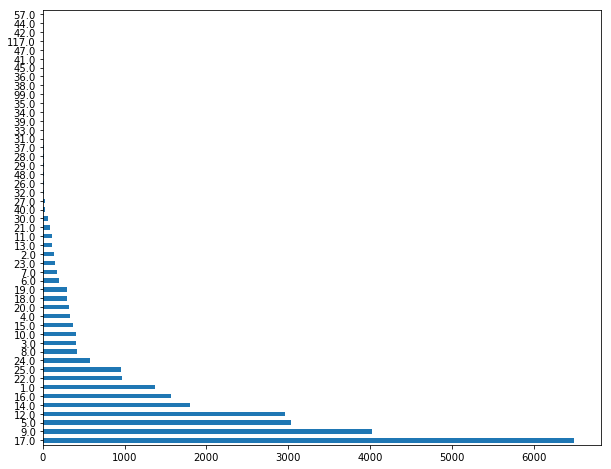

In [25]:
df_all.max_floor.value_counts().plot.barh()

In [26]:
# Вангую, что, если floor > max_floor, то их перепутали местами.
bad_index = df_all[ df_all.floor > df_all.max_floor ].index
df_all.ix[ bad_index, 'max_floor'], df_all.ix[ bad_index, 'floor'] = df_all.ix[ bad_index, 'floor'], df_all.ix[ bad_index, 'max_floor']

In [27]:
# Все, что выше 57 этажей - хрень. 57 этажей - это Триумф-Палас https://ru.wikipedia.org/wiki/Триумф-Палас 
bad_index = df_all[ df_all.max_floor > 57 ].index
df_all.ix[ bad_index, 'max_floor' ] = np.NaN

In [28]:
bad_index = df_all[df_all.state == 33].index
df_all.ix[bad_index, "state"] = 3

## Находим одинаковые дома и заполняем в них пропуски

In [29]:
coordinates = ['mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km']
quality = ['max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state']

In [30]:
df_all[ quality ].isnull().sum()

max_floor     10360
material       9572
build_year    14653
num_room       9586
kitch_sq      18043
state         14253
dtype: int64

In [31]:
meanQuality = df_all[ coordinates + quality ].groupby( coordinates ).aggregate( np.mean )

In [32]:
df_all.set_index( coordinates, inplace = True )
df_all.update( meanQuality )
df_all.reset_index( inplace = True )

In [33]:
df_all['material'] = df_all['material'].apply( np.round )

In [34]:
df_all[ quality ].isnull().sum()

max_floor     2714
material      2638
build_year    2955
num_room      2643
kitch_sq      3932
state         3493
dtype: int64

# Добавляем новые признаки

In [35]:
# Add month-year - не понял, надо ли именно так делать
month_year = (df_all.timestamp.dt.month + df_all.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
df_all['month_year_cnt'] = month_year.map(month_year_cnt_map)

# Add week-year count - не понял, надо ли именно так делать
week_year = (df_all.timestamp.dt.weekofyear + df_all.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
df_all['week_year_cnt'] = week_year.map(week_year_cnt_map)

# Add month and day-of-week
df_all['month'] = df_all.timestamp.dt.month
df_all['dow'] = df_all.timestamp.dt.dayofweek

# Other feature engineering - это фигня имхо, убрал
df_all['rel_floor'] = df_all['floor'] / df_all['max_floor'].astype(float)
df_all['rel_kitch_sq'] = df_all['kitch_sq'] / df_all['full_sq'].astype(float)

df_all[ 'elevator' ] = df_all[ 'max_floor' ] > 5
df_all[ 'is_first_floor' ] = df_all[ 'floor' ] == 1
df_all[ 'is_last_floor' ] = df_all[ 'floor' ] == df_all[ 'max_floor' ]
df_all[ 'age' ] = df_all.timestamp.dt.year - df_all.build_year

# Плотность населения.
df_all[ 'pop_density_raion' ] = df_all[ 'raion_popul' ] / df_all[ 'area_m' ]

# Демографические характеристики района
df_all[ 'young_ratio' ] = df_all[ 'young_all' ] / df_all[ 'full_all' ]
df_all[ 'work_ratio' ] = df_all[ 'work_all' ] / df_all[ 'full_all' ]
df_all[ 'retire_ratio' ] = df_all[ 'ekder_all' ] / df_all[ 'full_all' ]

# Образование
df_all[ 'peschool_ratio' ] = df_all[ 'children_preschool' ] / df_all[ 'preschool_quota' ]
df_all[ 'school_ratio' ] = df_all[ 'children_school' ] / df_all[ 'school_quota' ]

# Количество пропусков в ряду
df_all[ 'NaNs_count' ] = ( df_all == np.NaN ).sum( axis = 1 ).values

# Remove timestamp column (may overfit the model in train)
df_all.drop( ['timestamp'], axis=1, inplace=True )

In [36]:
# Deal with categorical values

# Кодируем район и материал стен.
df_all = pd.get_dummies( df_all, columns = ['sub_area', 'material'] )

df_numeric = df_all.select_dtypes(exclude=['object'])
df_obj = df_all.select_dtypes(include=['object']).copy()

for c in df_obj:
    df_obj[c] = pd.factorize(df_obj[c])[0]

df_all = pd.concat([df_numeric, df_obj], axis=1)

# Сохраняем данные

In [ ]:
df_train = df_all[ :num_train ].copy()
df_train.drop( ['id'], axis = 1, inplace = True )
df_test = df_all[ num_train: ].copy()
df_test.drop( ['price_doc'], axis = 1, inplace = True )

In [ ]:
df_train.to_csv( './train_preprocessed.csv', index = False )
df_test.to_csv( './test_preprocessed.csv', index = False )